In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/05/25 21:12:03] INFO     No custom team name replacements found. You can configure these in       ]8;id=703781;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=738329;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=850633;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=30446;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#195\195]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/05/25 21:12:06] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=730066;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=97726;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/05/25 21:12:13] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=426702;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=385907;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[06/05/25 21:12:19] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=493907;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=253835;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  215  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  208  2.3   
                                    Fausto Vera           5  439  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes       \
                                                                Gls  Ast   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0   
                                    Bernard                     0.0  0.0   
                                    Brahian Palacios            0.0  0.0   
                                    Caio Paulista               0.0  0.0   
                                    Fausto Vera                0.21  0.0   

                                                                               \
                                                       G+A  G-PK G+A-PK    xG   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.0    0.0  0.01   
                                    Bernard            0.0   0.0    0.0  0.02   
                                    Brahian Palacios   0.0   0.0    0.0   0.0   
                                    Caio Paulista      0.0   0.0    0.0  0.15   
                                    Fausto Vera       0.21  0.21   0.21  0.09   

                                                                         \
                                                       xAG xG+xAG  npxG   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.01  0.01   
                                    Bernard           0.18    0.2  

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                   \
                          MP Starts  ...            Gls  Ast   G+A  G-PK   
0  26-288  1998            7      7  ...            0.0  0.0   0.0   0.0   
1  32-270  1992            9      1  ...            0.0  0.0   0.0   0.0   
2  22-193  2002            1      0  ...            0.0  0.0   0.0   0.0   
3  27-025  1998            4      3  ...            0.0  0.0   0.0   0.0   
4  25-071  2000            7      5  ...           0.21  0.0  0.21  0.21   

                                            
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0    0.0  0.01   0.0   0.01  0.01     0.01  
1    0.0  0.02  0.18    0.2  0.02      0.2  
2    0.0   0.0   0.0    0.0   0.0      0.0  
3    0.0  0.15  0.04   0.19  0.15     0.19  
4   0.21  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [8]:
player_season_gk = fbref.read_player_season_stats(stat_type="keeper")
player_season_gk.head()

[06/05/25 21:12:27] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=581386;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=85163;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=86678;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=726369;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation pos     age  born  \
                                                                              
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Éverson           BRA  GK  34-318  1990   
                   Bahia            Marcos Felipe     BRA  GK  29-053  1996   
                                    Ronaldo           BRA  GK  28-287  1996   
                   Botafogo (RJ)    John              BRA  GK  29-112  1996   
                   Ceará            Bruno Ferreira    BRA  GK  31-081  1994   

                                                   Playing Time              \
                                                             MP Starts  Min   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Éverson                  11     11  990   
                   Bahia            Marcos Felipe             8      7  702   
                                    Ronaldo                   4      4  288   
                   Botafogo (RJ)    John                     11     11  990   
                   Ceará            Bruno Ferreira            4      4  333   

                                                         Performance        \
                                                     90s          GA  GA90   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Éverson         11.0          10  0.91   
                   Bahia            Marcos Felipe    7.8           7   0.9   
                                    Ronaldo          3.2           4  1.25   
                   Botafogo (RJ)    John            11.0           7  0.64   
                   Ceará            Bruno Ferreira   3.7           4  1.08   

                                                    ...                    \
                                                    ...  W  D  L CS   CS%   
league      season team             player          ...                     
BRA-Serie A 2526   Atlético Mineiro Éverson         ...  4  5  2  6  54.5   
                   Bahia            Marcos Felipe   ...  5  0  2  3  42.9   
                                    Ronaldo         ...  0  3  1  0   0.0   
                   Botafogo (RJ)    John            ...  5  3  3  6  54.5   
                   Ceará            Bruno Ferreira  ...  2  1  1  1  25.0   

                                                   Penalty Kicks               \
                                                           PKatt PKA PKsv PKm   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Éverson                    0   0    0   0   
                   Bahia            Marcos Felipe              2   2    0   0   
                                    Ronaldo                    1   0    1   0   
                   Botafogo (RJ)    John                       0   0    0   0   
                   Ceará            Bruno Ferreira             0   0    0   0   

                                                          
                                                   Save%  
league      season team             player                
BRA-Serie A 2526   Atlético Mineiro Éverson         <NA>  
                   Bahia            Marcos Felipe      0  
                                    Ronaldo          100  
                   Botafogo (RJ)    John            <NA>  
                   Ceará            Bruno Ferreira  <NA>  

[5 rows x 23 columns]

In [9]:
player_season_gk = player_season_gk.reset_index()
print(player_season_gk.columns)
player_season_gk.head()

MultiIndex([(       'league',       ''),
            (       'season',       ''),
            (         'team',       ''),
            (       'player',       ''),
            (       'nation',       ''),
            (          'pos',       ''),
            (          'age',       ''),
            (         'born',       ''),
            ( 'Playing Time',     'MP'),
            ( 'Playing Time', 'Starts'),
            ( 'Playing Time',    'Min'),
            ( 'Playing Time',    '90s'),
            (  'Performance',     'GA'),
            (  'Performance',   'GA90'),
            (  'Performance',   'SoTA'),
            (  'Performance',  'Saves'),
            (  'Performance',  'Save%'),
            (  'Performance',      'W'),
            (  'Performance',      'D'),
            (  'Performance',      'L'),
            (  'Performance',     'CS'),
            (  'Performance',    'CS%'),
            ('Penalty Kicks',  'PKatt'),
            ('Penalty Kicks',    'PKA'),
            ('Pe

league season              team          player nation pos     age  \
                                                                             
0  BRA-Serie A   2526  Atlético Mineiro         Éverson    BRA  GK  34-318   
1  BRA-Serie A   2526             Bahia   Marcos Felipe    BRA  GK  29-053   
2  BRA-Serie A   2526             Bahia         Ronaldo    BRA  GK  28-287   
3  BRA-Serie A   2526     Botafogo (RJ)            John    BRA  GK  29-112   
4  BRA-Serie A   2526             Ceará  Bruno Ferreira    BRA  GK  31-081   

   born Playing Time         ... Performance                Penalty Kicks      \
                  MP Starts  ...           W  D  L CS   CS%         PKatt PKA   
0  1990           11     11  ...           4  5  2  6  54.5             0   0   
1  1996            8      7  ...           5  0  2  3  42.9             2   2   
2  1996            4      4  ...           0  3  1  0   0.0             1   0   
3  1996           11     11  ...           5  3  3  6  54.5             0   0   
4  1994            4      4  ...           2  1  1  1  25.0             0   0   

                  
  PKsv PKm Save%  
0    0   0  <NA>  
1    0   0     0  
2    1   0   100  
3    0   0  <NA>  
4    0   0  <NA>  

[5 rows x 27 columns]

In [10]:
player_season_gkad = fbref.read_player_season_stats(stat_type="keeper_adv")
player_season_gkad.head()

[06/05/25 21:12:34] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=260832;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=975850;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=419600;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=324973;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation pos     age  born  \
                                                                              
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Éverson           BRA  GK  34-318  1990   
                   Bahia            Marcos Felipe     BRA  GK  29-053  1996   
                                    Ronaldo           BRA  GK  28-287  1996   
                   Botafogo (RJ)    John              BRA  GK  29-112  1996   
                   Ceará            Bruno Ferreira    BRA  GK  31-081  1994   

                                                     90s Goals               \
                                                            GA PKA FK CK OG   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Éverson         11.0    10   0  0  2  0   
                   Bahia            Marcos Felipe    7.8     7   2  0  0  0   
                                    Ronaldo          3.2     4   0  0  0  0   
                   Botafogo (RJ)    John            11.0     7   0  0  3  0   
                   Ceará            Bruno Ferreira   3.7     4   0  0  0  0   

                                                    ... Passes Goal Kicks  \
                                                    ... AvgLen        Att   
league      season team             player          ...                     
BRA-Serie A 2526   Atlético Mineiro Éverson         ...   34.3         37   
                   Bahia            Marcos Felipe   ...   28.4         64   
                                    Ronaldo         ...   31.3         20   
                   Botafogo (RJ)    John            ...   31.0         64   
                   Ceará            Bruno Ferreira  ...   47.0         40   

                                                                  Crosses      \
                                                   Launch% AvgLen     Opp Stp   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Éverson           29.7   34.8     129   5   
                   Bahia            Marcos Felipe     48.4   32.9     137   7   
                                    Ronaldo           60.0   39.4      53   6   
                   Botafogo (RJ)    John              43.8   40.3     152   8   
                   Ceará            Bruno Ferreira    72.5   53.1      71   4   

                                                         Sweeper          \
                                                    Stp%    #OPA #OPA/90   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Éverson          3.9      22     2.0   
                   Bahia            Marcos Felipe    5.1      13    1.67   
                                    Ronaldo         11.3       4    1.25   
                   Botafogo (RJ)    John             5.3       6    0.55   
                   Ceará            Bruno Ferreira   5.6       3    0.81   

                                                            
                                                   AvgDist  
league      season team             player                  
BRA-Serie A 2526   Atlético Mineiro Éverson           19.2  
                   Bahia            Marcos Felipe     15.6  
                                    Ronaldo           14.2  
                   Botafogo (RJ)    John              13.0  
                   Ceará            Bruno Ferreira    13.1  

[5 rows x 30 columns]

In [11]:
player_season_gkad = player_season_gkad.reset_index()
print(player_season_gkad.columns)
player_season_gkad.head()

MultiIndex([(    'league',         ''),
            (    'season',         ''),
            (      'team',         ''),
            (    'player',         ''),
            (    'nation',         ''),
            (       'pos',         ''),
            (       'age',         ''),
            (      'born',         ''),
            (       '90s',         ''),
            (     'Goals',       'GA'),
            (     'Goals',      'PKA'),
            (     'Goals',       'FK'),
            (     'Goals',       'CK'),
            (     'Goals',       'OG'),
            (  'Expected',     'PSxG'),
            (  'Expected', 'PSxG/SoT'),
            (  'Expected',  'PSxG+/-'),
            (  'Expected',      '/90'),
            (  'Launched',      'Cmp'),
            (  'Launched',      'Att'),
            (  'Launched',     'Cmp%'),
            (    'Passes', 'Att (GK)'),
            (    'Passes',      'Thr'),
            (    'Passes',  'Launch%'),
            (    'Passes',   'AvgLen'),


league season              team          player nation pos     age  \
                                                                             
0  BRA-Serie A   2526  Atlético Mineiro         Éverson    BRA  GK  34-318   
1  BRA-Serie A   2526             Bahia   Marcos Felipe    BRA  GK  29-053   
2  BRA-Serie A   2526             Bahia         Ronaldo    BRA  GK  28-287   
3  BRA-Serie A   2526     Botafogo (RJ)            John    BRA  GK  29-112   
4  BRA-Serie A   2526             Ceará  Bruno Ferreira    BRA  GK  31-081   

   born   90s Goals  ... Passes Goal Kicks                Crosses            \
                 GA  ... AvgLen        Att Launch% AvgLen     Opp Stp  Stp%   
0  1990  11.0    10  ...   34.3         37    29.7   34.8     129   5   3.9   
1  1996   7.8     7  ...   28.4         64    48.4   32.9     137   7   5.1   
2  1996   3.2     4  ...   31.3         20    60.0   39.4      53   6  11.3   
3  1996  11.0     7  ...   31.0         64    43.8   40.3     152   8   5.3   
4  1994   3.7     4  ...   47.0         40    72.5   53.1      71   4   5.6   

  Sweeper                  
     #OPA #OPA/90 AvgDist  
0      22     2.0    19.2  
1      13    1.67    15.6  
2       4    1.25    14.2  
3       6    0.55    13.0  
4       3    0.81    13.1  

[5 rows x 34 columns]

In [12]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_gk.columns = ['_'.join(col).strip() for col in player_season_gk.columns]
player_season_gkad.columns = ['_'.join(col).strip() for col in player_season_gkad.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_gk.columns)
print(player_season_gkad.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_GA', 'Performance_GA90',
    

In [13]:
df_gk_selected = player_season_gk[
    ['player_', 'team_', 'Performance_GA', 'Performance_SoTA', 'Performance_Saves','Performance_Save%','Performance_CS','Performance_CS%',]
]
df_gkad_selected = player_season_gkad[
    ['player_', 'team_','Expected_PSxG', 'Expected_PSxG+/-','Passes_Att (GK)','Passes_Launch%', 'Passes_AvgLen','Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%','Sweeper_#OPA',
       'Sweeper_#OPA/90', 'Sweeper_AvgDist']
]

In [14]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min',]
]
df_gk_selected = player_season_gk[
    ['player_', 'team_', 'Performance_GA', 'Performance_SoTA', 'Performance_Saves','Performance_Save%','Performance_CS','Performance_CS%',]
]
df_gkad_selected = player_season_gkad[
    ['player_', 'team_','Expected_PSxG', 'Expected_PSxG+/-','Passes_Att (GK)','Passes_Launch%', 'Passes_AvgLen','Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%','Sweeper_#OPA',
       'Sweeper_#OPA/90', 'Sweeper_AvgDist']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_gk_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_gkad_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

          player_             team_ pos_  Playing Time_Min  Performance_GA  \
0         Éverson  Atlético Mineiro   GK               990              10   
1   Marcos Felipe             Bahia   GK               702               7   
2         Ronaldo             Bahia   GK               288               4   
3            John     Botafogo (RJ)   GK               990               7   
4  Bruno Ferreira             Ceará   GK               333               4   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0                40                 30               75.0               6   
1                31                 24               83.9               3   
2                14                  9               71.4               0   
3                37                 29               81.1               6   
4                13                  9               69.2               1   

   Performance_CS%  ...  Expected_PSxG+/-  Passes_Att (GK)  Passes_L

In [15]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('DF|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


           player_             team_ pos_  Playing Time_Min  Performance_GA  \
0          Éverson  Atlético Mineiro   GK               990              10   
1    Marcos Felipe             Bahia   GK               702               7   
3             John     Botafogo (RJ)   GK               990               7   
5  Fernando Miguel             Ceará   GK               657               7   
8           Cássio          Cruzeiro   GK               990               8   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0                40                 30               75.0               6   
1                31                 24               83.9               3   
3                37                 29               81.1               6   
5                32                 25               84.4               3   
8                47                 38               83.0               5   

   Performance_CS%  ...  Expected_PSxG+/-  Passes_Att (GK)  Pa

In [16]:
# Selecionar as colunas desejadas para análise
Gol = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Performance_GA'),
    ('Performance_SoTA'),
    ('Performance_Saves'),
    ('Performance_Save%'),
    ('Performance_CS'),
    ('Performance_CS%'),
    ('Expected_PSxG'),
    ('Expected_PSxG+/-'),
    ('Passes_Att (GK)'),
    ('Passes_Launch%'),
    ('Passes_AvgLen'),
    ('Crosses_Opp'),
    ('Crosses_Stp'),
    ('Crosses_Stp%'),
    ('Sweeper_#OPA'),
    ('Sweeper_#OPA/90'),
    ('Sweeper_AvgDist'),
]]

# Renomear as colunas para facilitar o uso
Gol.columns = ['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']


# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Gol.head())
# Exportar o dataframe para um arquivo CSV
Gol.to_csv('gol_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para conferir
Gol.head


           jogador              time posicao  Minutos  GA  SoTA  Saves  \
0          Éverson  Atlético Mineiro      GK      990  10    40     30   
1    Marcos Felipe             Bahia      GK      702   7    31     24   
3             John     Botafogo (RJ)      GK      990   7    37     29   
5  Fernando Miguel             Ceará      GK      657   7    32     25   
8           Cássio          Cruzeiro      GK      990   8    47     38   

   Saves%  Clean Sheet  Clean Sheet%  ...  PSxG+/-  Passes Att  \
0    75.0            6          54.5  ...      2.3         350   
1    83.9            3          42.9  ...      2.5         239   
3    81.1            6          54.5  ...      2.9         342   
5    84.4            3          42.9  ...      1.4         168   
8    83.0            5          45.5  ...      3.8         139   

   Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  \
0            37.1           34.3          129            5           3.9   
1     

<bound method NDFrame.head of                jogador              time posicao  Minutos  GA  SoTA  Saves  \
0              Éverson  Atlético Mineiro      GK      990  10    40     30   
1        Marcos Felipe             Bahia      GK      702   7    31     24   
3                 John     Botafogo (RJ)      GK      990   7    37     29   
5      Fernando Miguel             Ceará      GK      657   7    32     25   
8               Cássio          Cruzeiro      GK      990   8    47     38   
9        Agustín Rossi          Flamengo      GK      990   4    31     25   
10               Fábio        Fluminense      GK      990  12    38     26   
11  João Ricardo Riedi         Fortaleza      GK      990  15    59     43   
12         Tiago Volpi            Grêmio      GK      990  14    48     34   
13             Anthoni     Internacional      GK      945  16    35     20   
19            Wéverton         Palmeiras      GK      990   8    33     24   
20  Cleiton Schwengber     RB Bragantino      GK      900   8    38     30   
22      Gabriel Brazão            Santos      GK      990  12    46     34   
23       Caíque França      Sport Recife      GK      990  18    49     32   
24        Rafael Pires         São Paulo      GK      990  11    39     29   
25          Léo Jardim     Vasco da Gama      GK      990  15    37     25   
27       Lucas Arcanjo           Vitória      GK      900  12    54     42   

    Saves%  Clean Sheet  Clean Sheet%  ...  PSxG+/-  Passes Att  \
0     75.0            6          54.5  ...      2.3         350   
1     83.9            3          42.9  ...      2.5         239   
3     81.1            6          54.5  ...      2.9         342   
5     84.4            3          42.9  ...      1.4         168   
8     83.0            5          45.5  ...      3.8         139   
9     87.1            8          72.7  ...      1.5         278   
10    68.4            3          27.3  ...     -1.4         163   
11    74.6            5          45.5  ...      1.6         246   
12    79.2            3          27.3  ...      3.8         259   
13    57.1            2          20.0  ...     -4.3         165   
19    78.8            5          45.5  ...      1.8         240   
20    78.9            5          50.0  ...      1.2         230   
22    73.9            3          27.3  ...     -1.4         182   
23    69.4            2          18.2  ...     -1.3         196   
24    79.5            3          27.3  ...      3.0         187   
25    59.5            2          18.2  ...     -0.5         236   
27    77.8            1          10.0  ...      2.6         237   

    Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  \
0             37.1           34.3          129            5           3.9   
1             23.0           28.4          137            7           5.1   
3             26.3           31.0          152            8           5.3   
5             51.8           39.5          148            9           6.1   
8             40.3           36.7          164            4           2.4   
9             25.2           29.1          125            7           5.6   
10            23.3           28.3          155            7           4.5   
11            39.0           34.7          144            9           6.3   
12            48.3           40.0          193            9           4.7   
13            35.2           33.2          106            4           3.8   
19            47.1           39.6          148           11           7.4   
20            27.8           31.6          184            9           4.9   
22            39.6           34.2          154            3           1.9   
23            27.6           31.7          141            9           6.4   
24            47.1           38.5          189            4           2.1   
25            26.7           31.4          192           11           5.7   
27            30.0           32.1          165   

### **2. Criar modelos de classificação para  (Goleiros)**

In [17]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Gol[['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=3, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Gol['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Gol[['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist']])

    GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  \
0   10    40     30    75.0            6          54.5  12.3      2.3   
1    7    31     24    83.9            3          42.9   9.5      2.5   
3    7    37     29    81.1            6          54.5   9.9      2.9   
5    7    32     25    84.4            3          42.9   8.4      1.4   
8    8    47     38    83.0            5          45.5  11.8      3.8   
9    4    31     25    87.1            8          72.7   5.5      1.5   
10  12    38     26    68.4            3          27.3  10.6     -1.4   
11  15    59     43    74.6            5          45.5  16.6      1.6   
12  14    48     34    79.2            3          27.3  17.8      3.8   
13  16    35     20    57.1            2          20.0  10.7     -4.3   
19   8    33     24    78.8            5          45.5   9.8      1.8   
20   8    38     30    78.9            5          50.0   9.2      1.2   
22  12    46     34    73.9            3          2

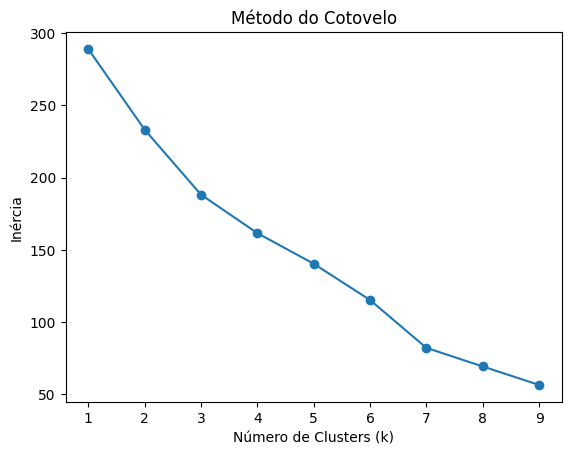

In [18]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [19]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [20]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Gol.groupby('Cluster').agg({col: 'mean' for col in Gol.select_dtypes(include=['number']).columns})
print(cluster_summary)

         Minutos         GA       SoTA      Saves  Saves%  Clean Sheet  \
Cluster                                                                  
0          927.0   7.333333       35.0       27.0    80.8          5.5   
1          934.5  11.166667  45.166667  33.833333    79.1     3.666667   
2          963.0       14.6       42.6       29.0   66.44          2.0   

         Clean Sheet%       PSxG   PSxG+/-  Passes Att  Passes Launch%  \
Cluster                                                                  
0               53.35   9.366667  2.033333  279.833333       31.083333   
1           35.966667  13.033333  2.033333  196.833333           44.35   
2               18.74      12.62     -0.98       199.4           28.56   

         Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  \
Cluster                                                                        
0            32.333333   145.833333     7.833333      5.366667     11.166667   
1            37.26

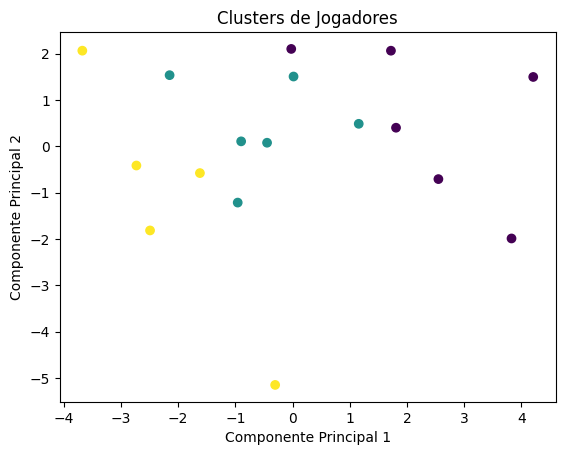

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [22]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Gol.select_dtypes(include=np.number).columns
correlation_matrix = Gol[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                  Minutos        GA      SoTA     Saves    Saves%  \
Minutos          1.000000  0.356681  0.372410  0.257393 -0.339427   
GA               0.356681  1.000000  0.571480  0.239236 -0.791898   
SoTA             0.372410  0.571480  1.000000  0.928789 -0.109922   
Saves            0.257393  0.239236  0.928789  1.000000  0.209902   
Saves%          -0.339427 -0.791898 -0.109922  0.209902  1.000000   
Clean Sheet      0.243770 -0.657212 -0.247003 -0.046832  0.524839   
Clean Sheet%    -0.058551 -0.778224 -0.384754 -0.149851  0.634228   
PSxG             0.322311  0.742414  0.828107  0.657177 -0.254397   
PSxG+/-         -0.100038 -0.523173  0.134821  0.410003  0.791307   
Passes Att       0.180593 -0.257629 -0.062332  0.031480  0.229550   
Passes Launch%  -0.065027  0.019015  0.127810  0.138508  0.213060   
Passes AvgLen    0.003133  0.045017  0.156108  0.165750  0.203902   
Crosses Opp      0.141825  0.089544  0.232689  0.303183  0.087690   
Crosses Stp     -0.160199  0.07749

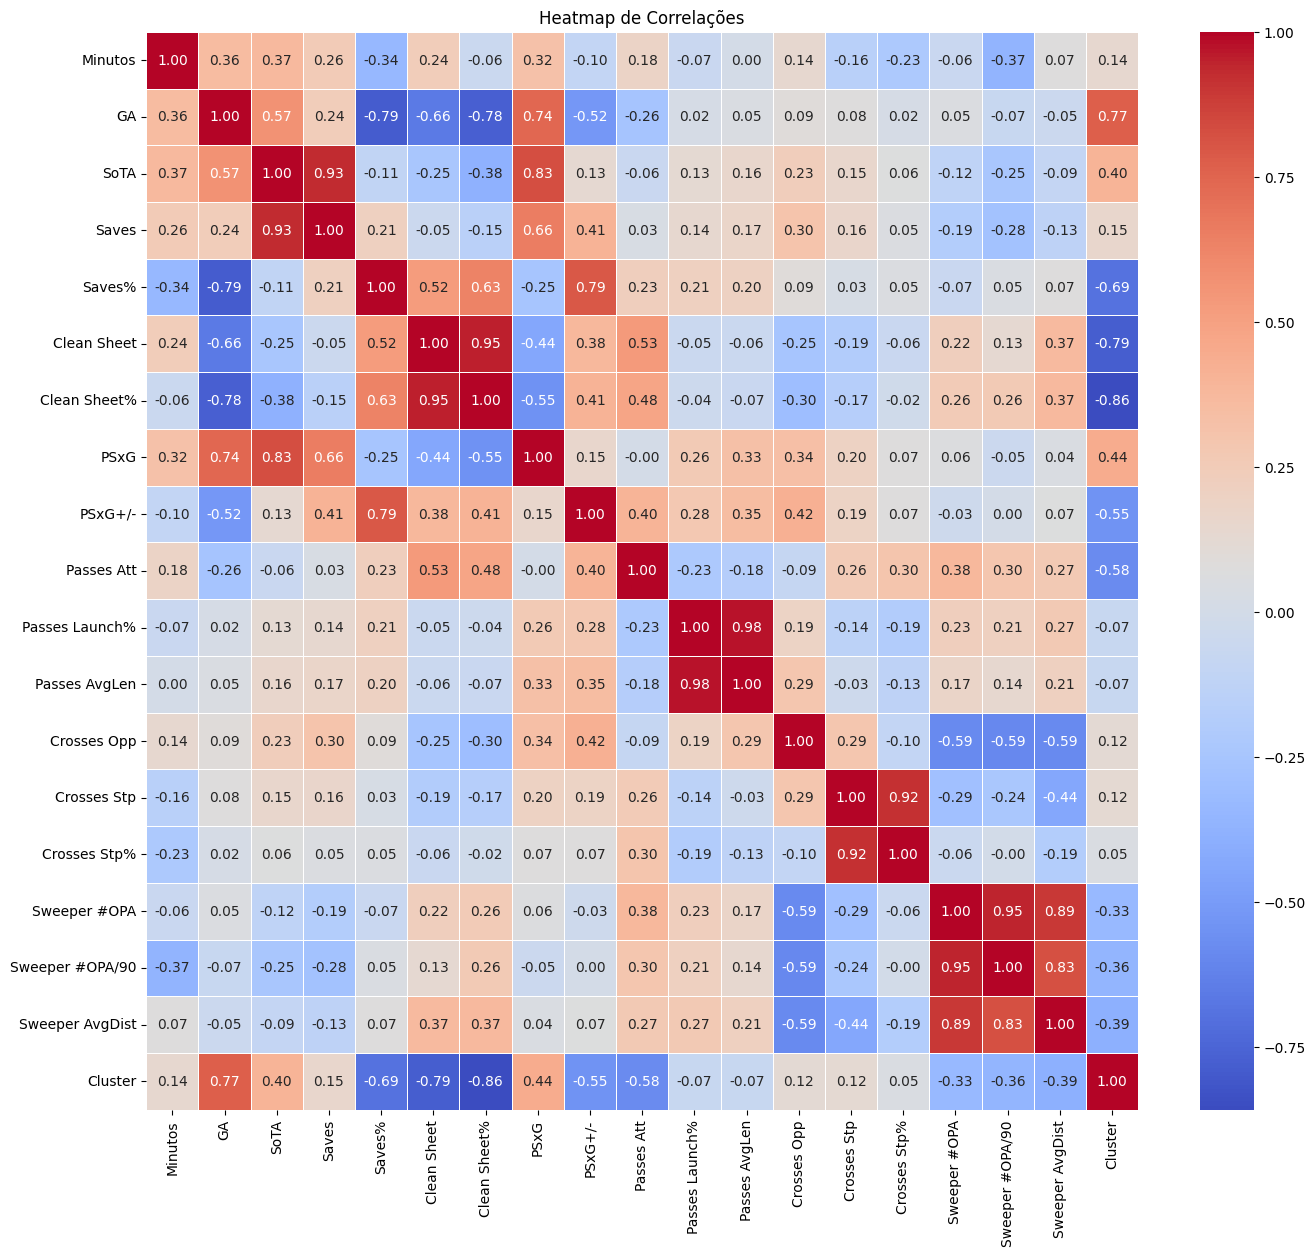

In [23]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

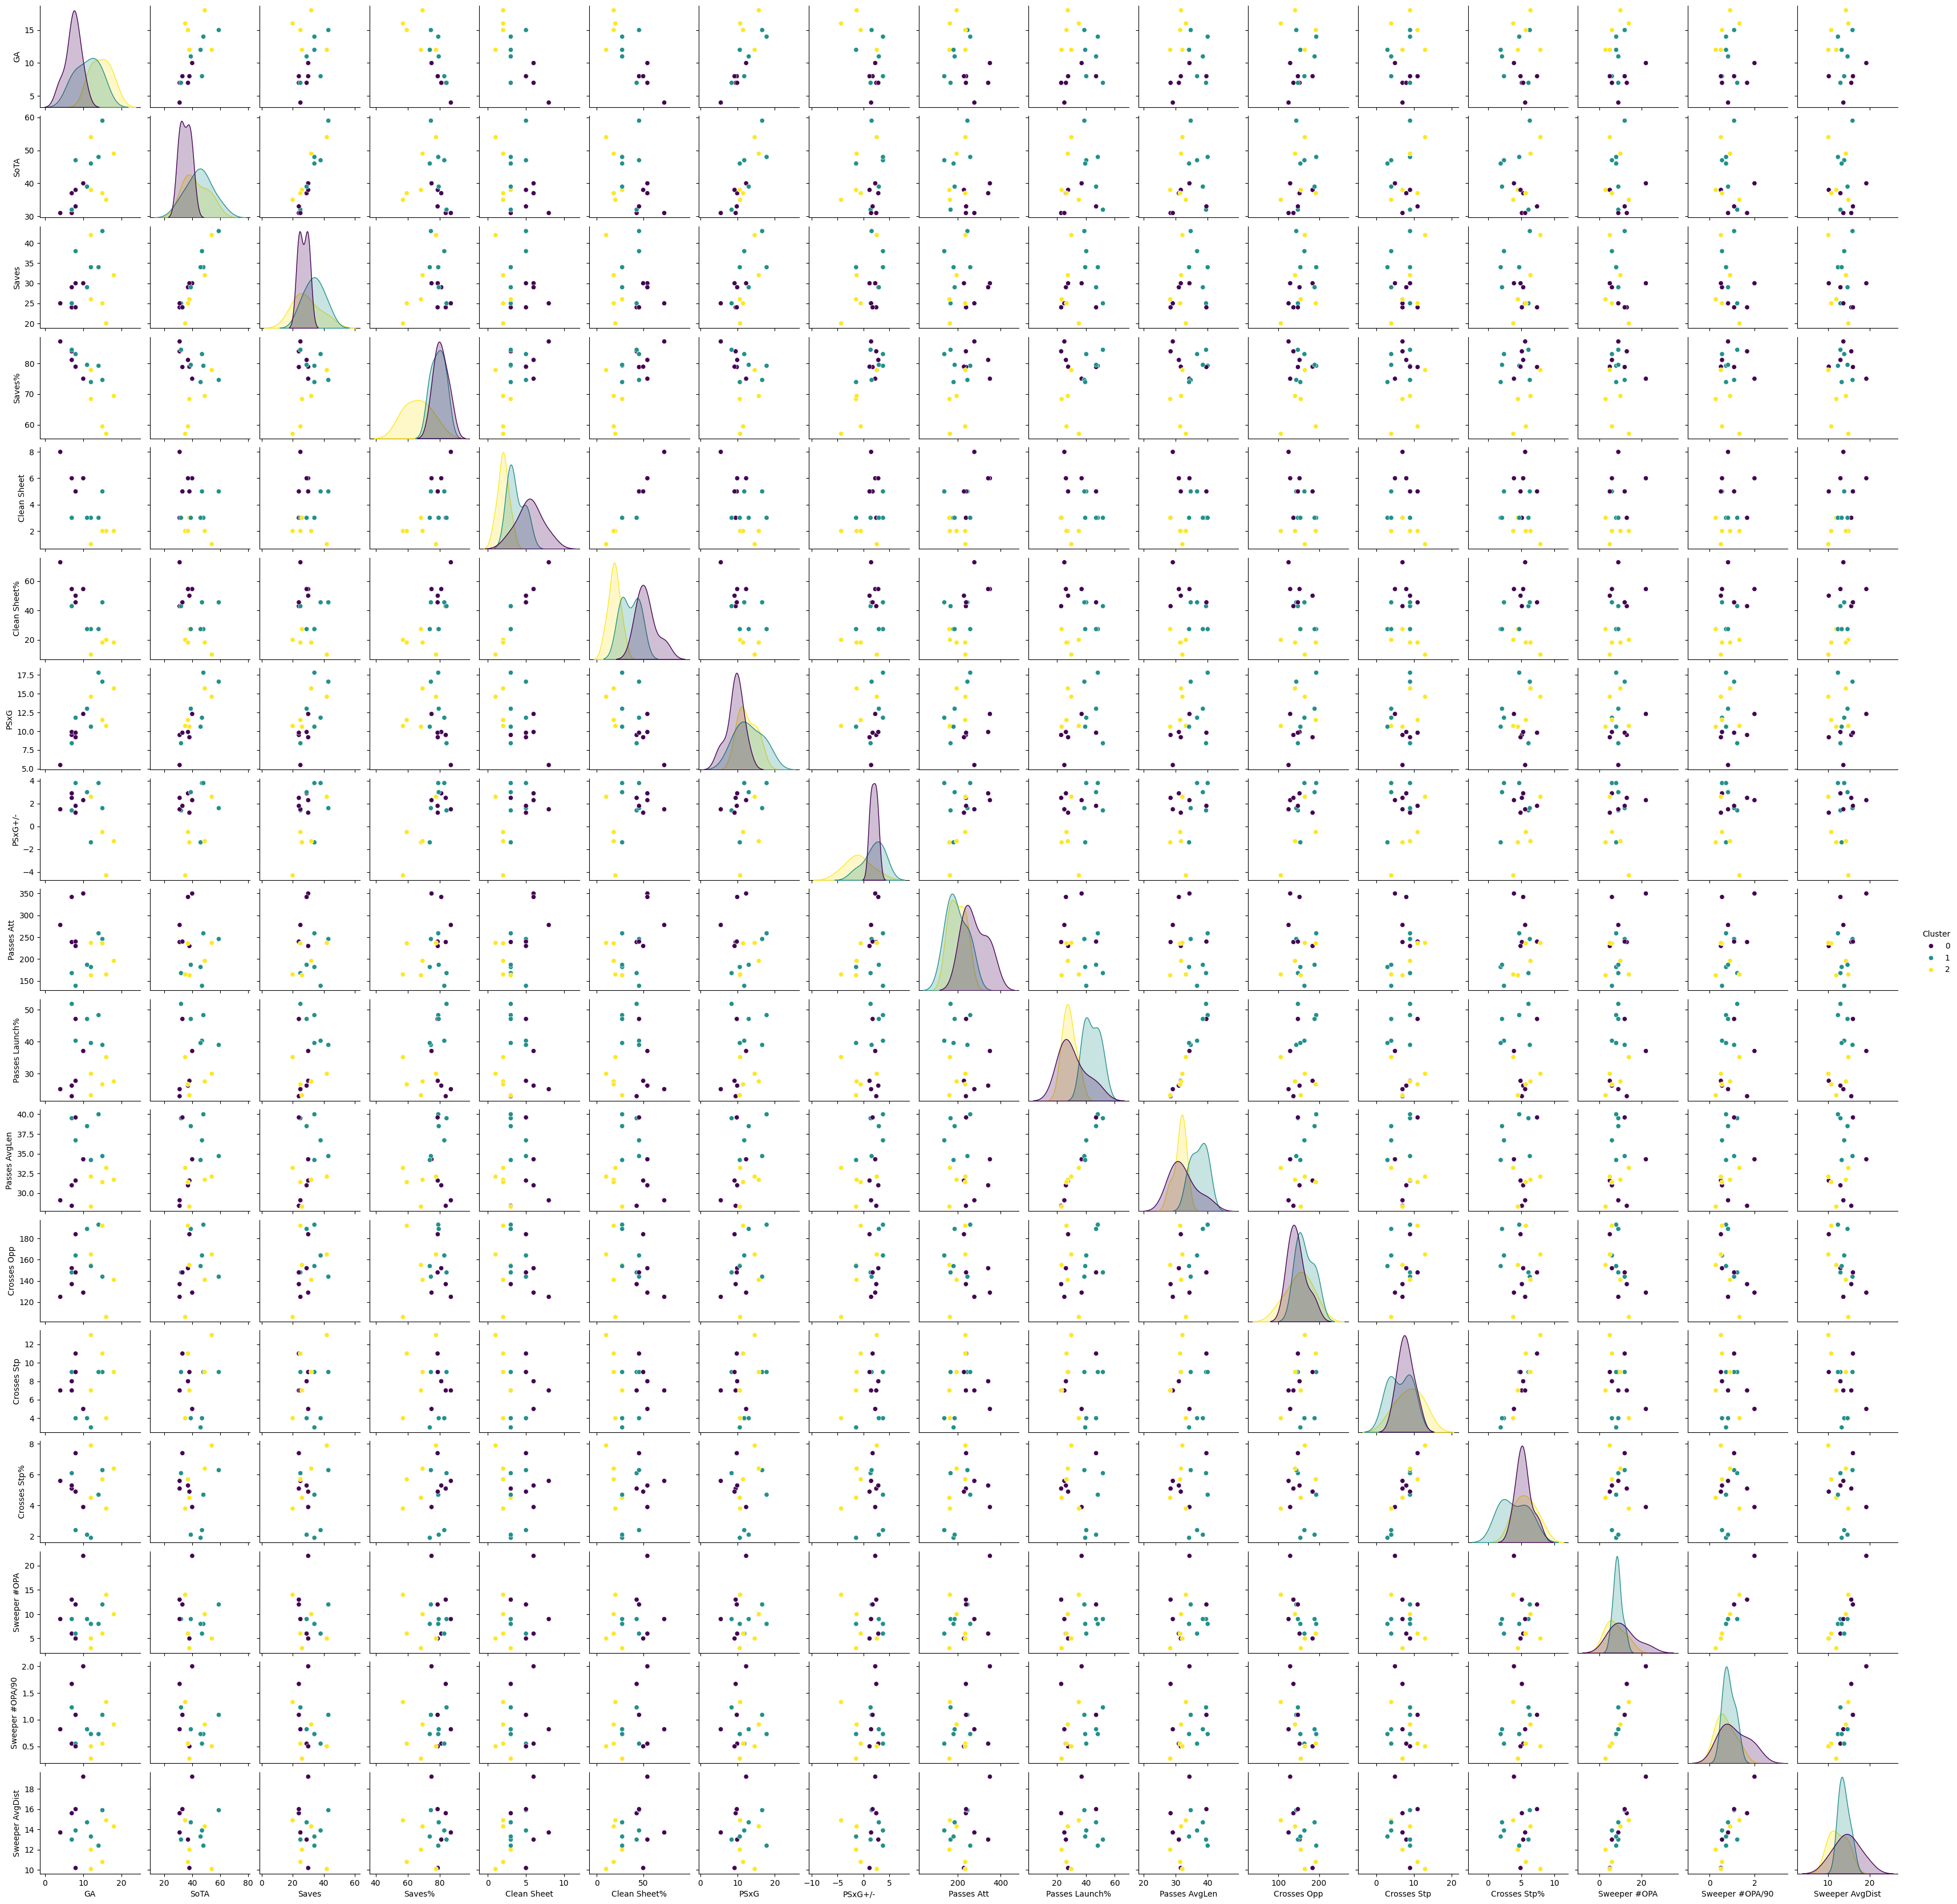

In [24]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Gol[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Goleiros**

---

### **1. Análise de Correlações com Insights**

## 🔥 Correlações Fortes (r > 0.70)
- **Saves% & Clean Sheet%**: 0.79 → Goleiros com melhor taxa de defesa tendem a manter mais jogos sem sofrer gols.
- **GA & PSxG**: 0.74 → Alta relação entre gols sofridos e a expectativa de gols pós-finalização.
- **Crosses Stp & Crosses Stp%**: 0.94 → Alta coerência entre o número e a eficiência na interceptação de cruzamentos.
- **Passes AvgLen & Passes Launch%**: 0.98 → Goleiros que realizam passes longos o fazem com alta frequência.

---

## ⚖️ Correlações Moderadas (0.50 < r < 0.69)
- **Sweeper #OPA/90 & Sweeper AvgDist**: 0.59 → Quanto mais o goleiro sai da área, maior a distância média dessas saídas.
- **SoTA & Saves**: 0.66 → Goleiros que enfrentam mais chutes no alvo realizam mais defesas.
- **Clean Sheet% & Saves%**: 0.55 → Boa taxa de defesas está ligada a mais partidas sem sofrer gols.

---

## 🚫 Correlações Negativas Relevantes
- **Saves% & GA**: -0.79 → Quanto maior a % de defesas, menor o número de gols sofridos.
- **Clean Sheet% & GA**: -0.86 → Goleiros que sofrem menos gols tendem a ter mais jogos sem sofrer gols.
- **Cluster & Clean Sheet%**: -0.86 → Cluster mais eficiente (Roxo) apresenta maior taxa de clean sheets.

---


### **2. Perfis dos Clusters com Médias**

### 🟣 Cluster 0 (Roxo)
- Alta porcentagem de defesas (**Saves%**) e bom desempenho em **Clean Sheet%**.
- Baixos valores de **GA** (Gols Sofridos) e **PSxG**.
- Goleiros com alta eficiência defensiva.
- Estilo mais tradicional, com foco na proteção da meta.
- Provavelmente goleiros de equipes bem organizadas defensivamente.

---

### 🔵 Cluster 1 (Ciano)
- Alta média em **Sweeper #OPA/90** e **Sweeper AvgDist**.
- Também se destacam em métricas de distribuição, como **Passes Launch%** e **Passes AvgLen**.
- Perfil de **goleiros modernos**, que atuam fora da área e participam da construção de jogo.
- Comportamento típico de goleiros em times que jogam com linha alta ou com saída curta sob pressão.

---

### 🟡 Cluster 2 (Amarelo)
- Altos valores em **GA** e **PSxG**, com **Saves%** abaixo da média.
- Baixa taxa de **Clean Sheet%**.
- Goleiros mais exigidos, mas com baixo desempenho relativo.
- Perfil de goleiros que sofrem muitos gols, possivelmente por falhas defensivas coletivas ou desempenho individual abaixo do esperado.
- Pode incluir goleiros de equipes da parte inferior da tabela.
---


In [31]:
cluster_names = {
    0: 'goleiros classico',
    1: 'goleiros liberos',
    2: 'goleiros sr',
}

# Adicionar nomes ao DataFrame
Gol['Perfil'] = Gol['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Gol[['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist','Perfil']].head())

           jogador              time posicao  Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist             Perfil
0          Éverson  Atlético Mineiro      GK      990  10    40     30    75.0            6          54.5  12.3      2.3         350            37.1           34.3          129            5           3.9            22              2.0             19.2  goleiros classico
1    Marcos Felipe             Bahia      GK      702   7    31     24    83.9            3          42.9   9.5      2.5         239            23.0           28.4          137            7           5.1            13             1.67             15.6  goleiros classico
3             John     Botafogo (RJ)      GK      990   7    37     29    81.1            6          54.5   9.9      2.9         342            26.3           31.0          152           

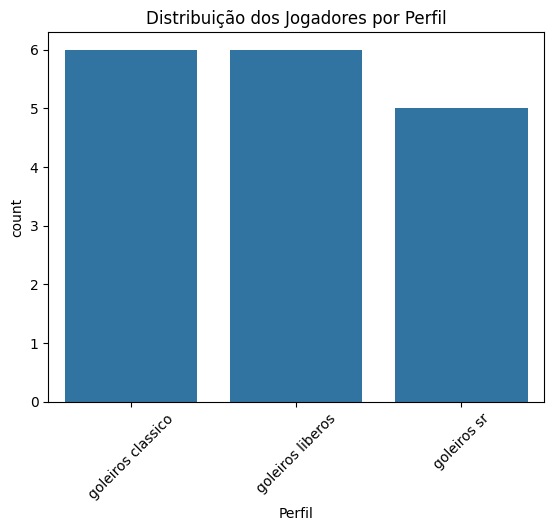

In [32]:
sns.countplot(data=Gol, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [37]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador', 'time', 'posicao', 'Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "goleiros sr"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: goleiros sr
          jogador           time posicao  Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist
10          Fábio     Fluminense      GK      990  12    38     26    68.4            3          27.3  10.6     -1.4         163            23.3           28.3          155            7           4.5             3             0.27             12.0
13        Anthoni  Internacional      GK      945  16    35     20    57.1            2          20.0  10.7     -4.3         165            35.2           33.2          106            4           3.8            14             1.33             14.9
23  Caíque França   Sport Recife      GK      990  18    49     32    69.4            2          18.2  15.7     -1.3         196            27.6           31.7          141            9           6.4            10         

In [34]:
# Dicionário dos peso para cada métrica
pesos = {
    'GA': -5,
    'Saves': 2,
    'Clean Sheet': 10,
    'PSxG': 5,
    'Passes Launch%': 3,
    'Crosses Stp%': 5,
    'Sweeper #OPA' : 5,
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Gol[coluna + '_Pontuacao'] = Gol[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Gol['Pontuacao_Total'] = Gol[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Gol['Pontuacao_Total'].min()
max_pontuacao = Gol['Pontuacao_Total'].max()
Gol['Pontuacao'] = (
    (Gol['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'goleiros liberos'
jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: goleiros liberos
 Ranking      time posicao            jogador           Perfil  Pontuacao
       1 Fortaleza      GK João Ricardo Riedi goleiros liberos   89.57346
       2    Grêmio      GK        Tiago Volpi goleiros liberos  75.302791
       3     Ceará      GK    Fernando Miguel goleiros liberos  71.353344
       4  Cruzeiro      GK             Cássio goleiros liberos  66.087414
       5 São Paulo      GK       Rafael Pires goleiros liberos  59.189047
       6    Santos      GK     Gabriel Brazão goleiros liberos  40.494997


In [35]:
4# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'goleiros liberos'  # Defina o perfil desejado
jogadores_filtrados = Gol[Gol['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'goleiros liberos': ['Fernando Miguel', 'Cássio', 'João Ricardo Riedi', 'Tiago Volpi', 'Gabriel Brazão', 'Rafael Pires']
Digite o nome do jogador (ou 'sair' para finalizar): Cássio
Insira o valor de mercado para Cássio (€M): 1
Digite o nome do jogador (ou 'sair' para finalizar): Gabriel Brazão
Insira o valor de mercado para Gabriel Brazão (€M): 5
Digite o nome do jogador (ou 'sair' para finalizar): Rafael Pires
Insira o valor de mercado para Rafael Pires (€M): 3
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking            jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1             Cássio                    1.0  66.087414              0.015131       66.087414
       2       Rafael Pires                    3.0  59.189047              0.050685       19.729682
       3     Gabriel Brazão                    5.0  40.494997              0.123472        8.098


Jogadores selecionados: Marcos Felipe, Cássio, Cleiton Schwengber, Gabriel Brazão, Léo Jardim, Lucas Arcanjo
    Minutos  GA  SoTA  Saves  Saves%  Clean Sheet  Clean Sheet%  PSxG  PSxG+/-  Passes Att  Passes Launch%  Passes AvgLen  Crosses Opp  Crosses Stp  Crosses Stp%  Sweeper #OPA  Sweeper #OPA/90  Sweeper AvgDist
1       702   7    31     24    83.9            3          42.9   9.5      2.5         239            23.0           28.4          137            7           5.1            13             1.67             15.6
8       990   8    47     38    83.0            5          45.5  11.8      3.8         139            40.3           36.7          164            4           2.4             6             0.55             13.9
20      900   8    38     30    78.9            5          50.0   9.2      1.2         230            27.8           31.6          184            9           4.9             5              0.5             10.2
22      990  12    46     34    73.9            3 

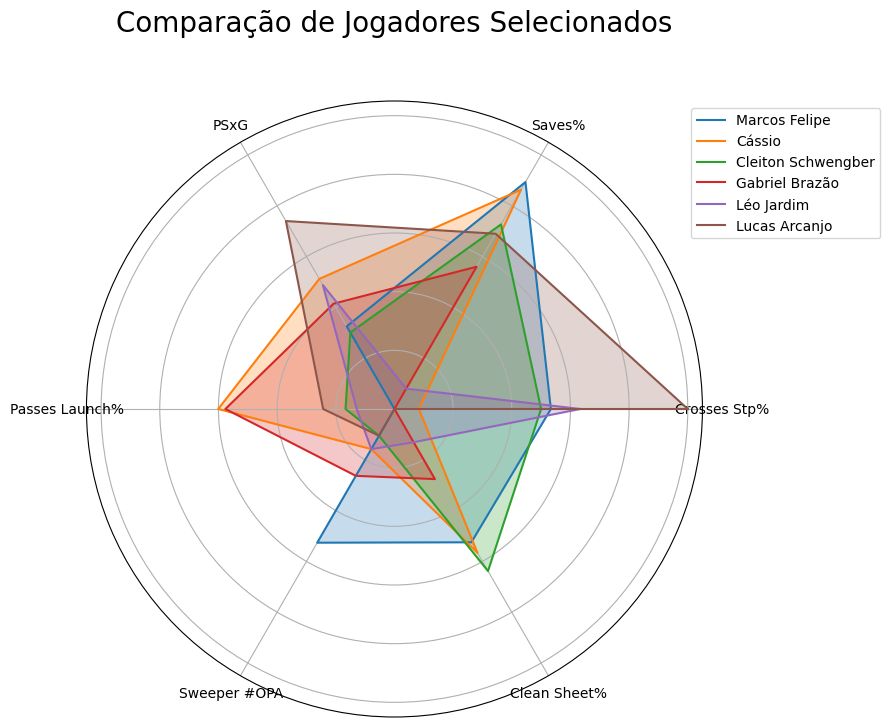

In [39]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['Minutos', 'GA', 'SoTA', 'Saves', 'Saves%', 'Clean Sheet','Clean Sheet%','PSxG', 'PSxG+/-', 'Passes Att', 'Passes Launch%', 'Passes AvgLen','Crosses Opp','Crosses Stp','Crosses Stp%','Sweeper #OPA','Sweeper #OPA/90','Sweeper AvgDist',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Crosses Stp%', 'Saves%', 'PSxG', 'Passes Launch%','Sweeper #OPA','Clean Sheet%',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Gabriel Brazão', 'Cássio','Marcos Felipe','Cleiton Schwengber','Lucas Arcanjo','Léo Jardim']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Gol)